<a href="https://www.kaggle.com/code/leonczarlinski/prediction-using-multiple-linear-regresion?scriptVersionId=145640380" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# University Admission Prediction Using Multiple Linear Regression

This hands-on project aims to train a regression model to find the probability of a student  getting accepted into a particular university based on their profile. This project could be practically used to get the university acceptance rate for individual students using web application.

Think of this project as a project that could be implemented at the university side. The university could collect all the data beforehand in which the commitee, for example, that decide which studens should be able to enroll in it will be accepted in a university program based on the features we can extract all that data such as GRE Score, TOEFL score, university rating, statement of purpose, Letter of Recommendation, GPA and research experience.

**[Data source](https://www.kaggle.com/mohansacharya/graduate-admissions)**

## TASK #1: UNDERSTAND THE PROBLEM STATEMENT

The problem statement is:
* What does the dataset shows as a broad ideia?
* What insights and profile can we get from this datase?
* How can we train and evaluate an artificial neural network to perform a regression task for us?

The data set contains some information that will give us the answer. The dataframe has the following information:

Inputs features:
 * GRE Scores (out of 340)
 * TOEFL Scores (out of 120)
 * University Rating (out of 5)
 * Statement of purpose (SOP)
 * Letter of recommendation (LOR) strength (out of 5)
 * Undergraduate GPA (out of 10)
 * REsearch Experience (either 0 or 1)

Outputs:
 * Chance of admission (rating from 0 to 1)

## TASK #2: IMPORT LIBRARIES AND DATASET

To work with the data frame, we are going to import some libraries, such as pandas (used for data frame manipulation), numpy (used for numerical analysis), seaborn (used for data visualization) and matplotlib (used for data visualization as well)

We are also going to do some checks about the data frame to see if there are some information we need to be aware of it, before working with it.

In [1]:
import pandas as pd #used for data frame manipulation
import numpy as np #used for numerical analysis
import seaborn as sns #used for data visualization
import matplotlib.pyplot as plt #used for data visualization
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


The **.read_csv** is a method to read the file and link it to the variable, in this case *admission_df*

In [2]:
admission_df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
admission_df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


The **.head(n)** is a method that returns a specified number of rows, string from the top.
*n* is the parameter, and by default, **.head()** method returns the first 5 rows.

In [3]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


The **.count()** method will give us an idea on how many data we have for each column in the data frame.

In [4]:
admission_df.count()

Serial No.           500
GRE Score            500
TOEFL Score          500
University Rating    500
SOP                  500
LOR                  500
CGPA                 500
Research             500
Chance of Admit      500
dtype: int64

Now that we have an ideia of how many values we have in this dataframe, we are going to use a combination of methods to check how many *null values* are in the data frame:

In [5]:
# checking the null values. If I have any null values, we can drop or fill with mean values
admission_df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Now we can check the dataframe information by using the method **.info()**. Using this method we will have the information of null values, data type, and columns.

In [6]:
# Check the dataframe information. How many elements we have with the data type for each of them
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


## TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

Now that we have imported the data set,  defined the dataframe, imported libraries and checked the data, we achieved the **prepare** and **process** the data, so we can go on and do the **analysis** and some **visualization** based on the insights that we got here.

Because we are not going to use the *Serial No.* column, we are going to drop it in memory, so we can use only the parameters we want to do the analysis.

In [7]:
# Let's drop the serial no.
#axis = 1 indicates drop the entire column
#inplace = True indicates that the column will be dropped in memory
admission_df.drop('Serial No.', axis = 1, inplace = True)
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


The first analysis we are going to do is the description of the data frame, so we can know the min and max value for each column, mean, count, and the standard deviation which is the measure of the dispertion away from the mean.
So, for example, when it comes to GRE Score, the max score is 340 and the min score is 290. The mean is 316 and values within the data frame are within about 11 units of the mean.

In [8]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Let's now make an analysis grouping the information by *University Rating* to have an ideia of the mean numbers for each category.
The formula below groups by university rating and brings the mean info for each column. For example, the universities that has a rating of 1, on average, students have a GRE Score of 304

In [9]:
# Grouping by University ranking
df_university = admission_df.groupby(by = 'University Rating')
df_university.mean()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


We can also describe the information for each rating. So, let's get for example, the University with **ranking 3** and check the profile of students that would be admited to the university.

In [10]:
df_university1 = df_university.get_group(3)
df_university1.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,162.000000,162.000000,162.0,162.000000,162.000000,162.000000,162.000000,162.000000
mean,315.030864,106.314815,3.0,3.308642,3.401235,8.500123,0.537037,0.702901
std,8.096025,4.333134,0.0,0.645423,0.755599,0.406011,0.500173,0.098427
min,297.000000,97.000000,3.0,2.000000,1.500000,7.400000,0.000000,0.360000
25%,311.000000,103.000000,3.0,3.000000,3.000000,8.210000,0.000000,0.642500
50%,316.000000,106.000000,3.0,3.500000,3.500000,8.545000,1.000000,0.720000
75%,321.000000,110.000000,3.0,3.500000,4.000000,8.780000,1.000000,0.770000
max,331.000000,120.000000,3.0,5.000000,5.000000,9.320000,1.000000,0.900000


## TASK #4: PERFORM DATA VISUALIZATION

Now, let's perform some data visualization. We will plot the histogram, or distribution of all variables to check where the data is concentrated.
Distribution graph displays the spread of various outcomes in a dataset.
From the distribution graphs below, we can notice that the ammount of students is higher in the middle of the graph, where the mean grades are.

array([[<Axes: title={'center': 'GRE Score'}>,
        <Axes: title={'center': 'TOEFL Score'}>,
        <Axes: title={'center': 'University Rating'}>],
       [<Axes: title={'center': 'SOP'}>,
        <Axes: title={'center': 'LOR '}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance of Admit '}>, <Axes: >]],
      dtype=object)

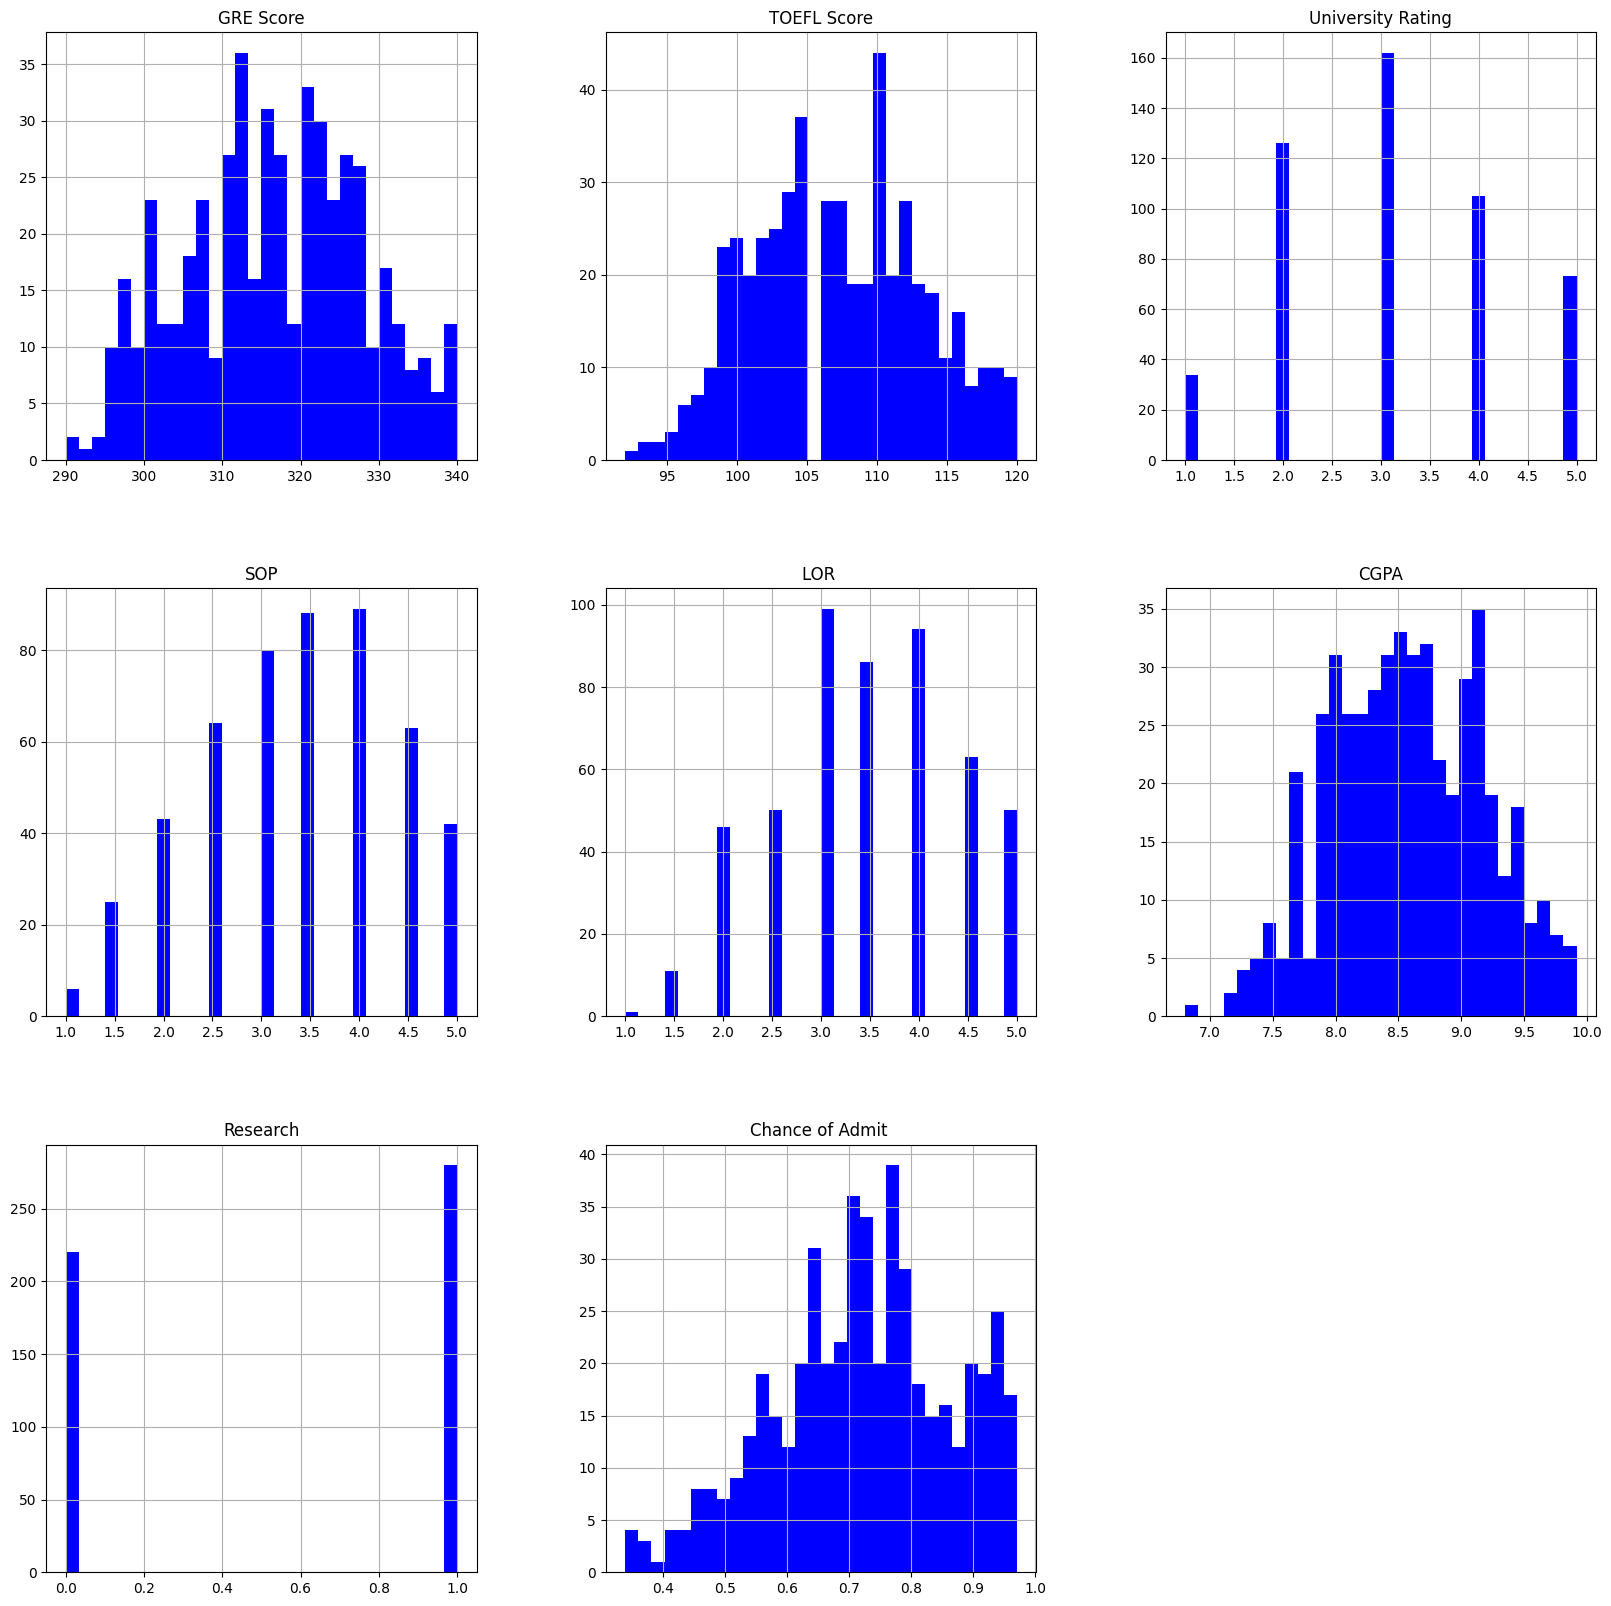

In [11]:
#plot the histogram, or distribuition of all our variables
admission_df.hist(bins = 30, figsize = (20, 20), color = 'b')

Now that we have seen some distribution graphs, we can choose some fields so we can go deeper into analysis. So, another way to display a distribution graph is by using the **.histplot** for each column
Here we are defining the bins = 30, which means that we are dividing the data into 30 equally spaced intervals on the x-axis of the histogram

Text(0.5, 1.0, 'Distribution of GRE Scores')

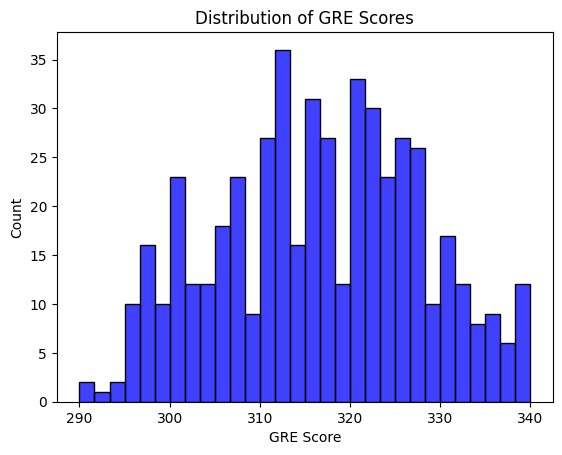

In [12]:
sns.histplot(admission_df['GRE Score'], bins=30, kde=False, color='b')
plt.title("Distribution of GRE Scores")

Text(0.5, 1.0, 'Distribution of TOEFL Scores')

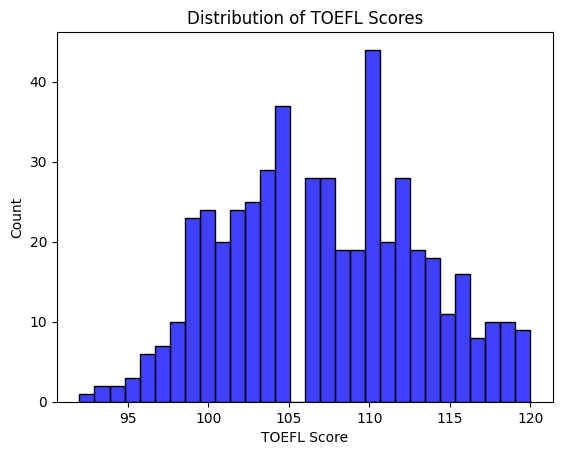

In [13]:
sns.histplot(admission_df['TOEFL Score'], bins=30, kde=False, color='b')
plt.title("Distribution of TOEFL Scores")

Now, let's plot the correlations. It seems to be a higher correlation between the Chance of admission and CGPA. Also, students that have a higher TOEFL score or a CGPA tend to have a higher GRE score. This heatmap use colors to compare categories in the data set. They are mainly used to show relationships between two variables and used a system of color-coding to represent different values.

<Axes: >

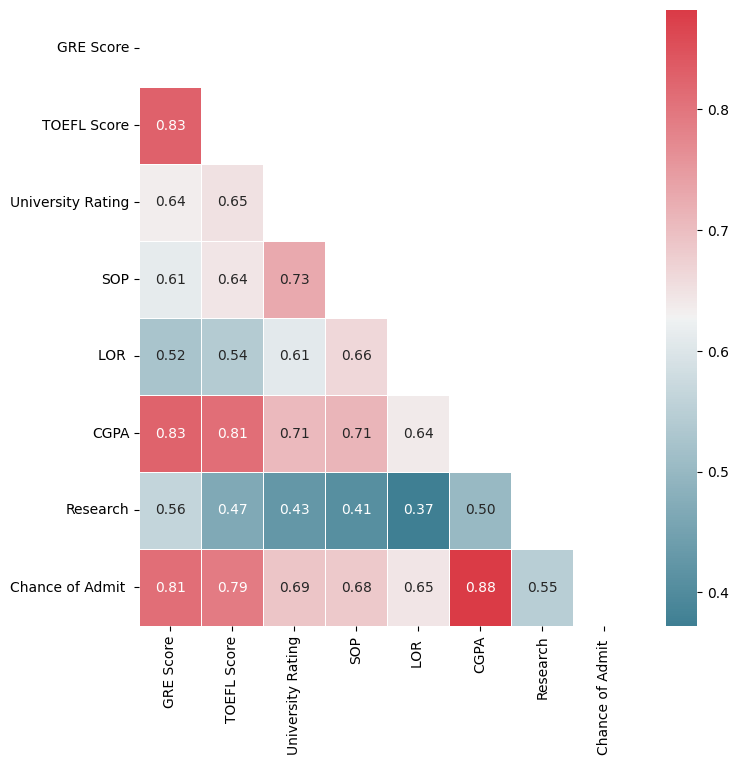

In [14]:
#plot the correlations.
corr_matrix = admission_df.corr()
fig, ax = plt.subplots(figsize=(8,8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)

Now, let's take a look into the relationship between every single variable or feature in the data frame.  

This is a good chance to understand the difference between **correlation vs causation**
There are three was to describe the correlation between variables:
* Positive correlation: As x increases, y increases
* Negative correlation: As x increases, y decreases
* No correlation: As x increases, y stays about the same or has no clear pattern

The Scatterplot shows relationship between different variables. Scatterplot are tipically used for two variables, for a set of data, although additional variables can be displayed

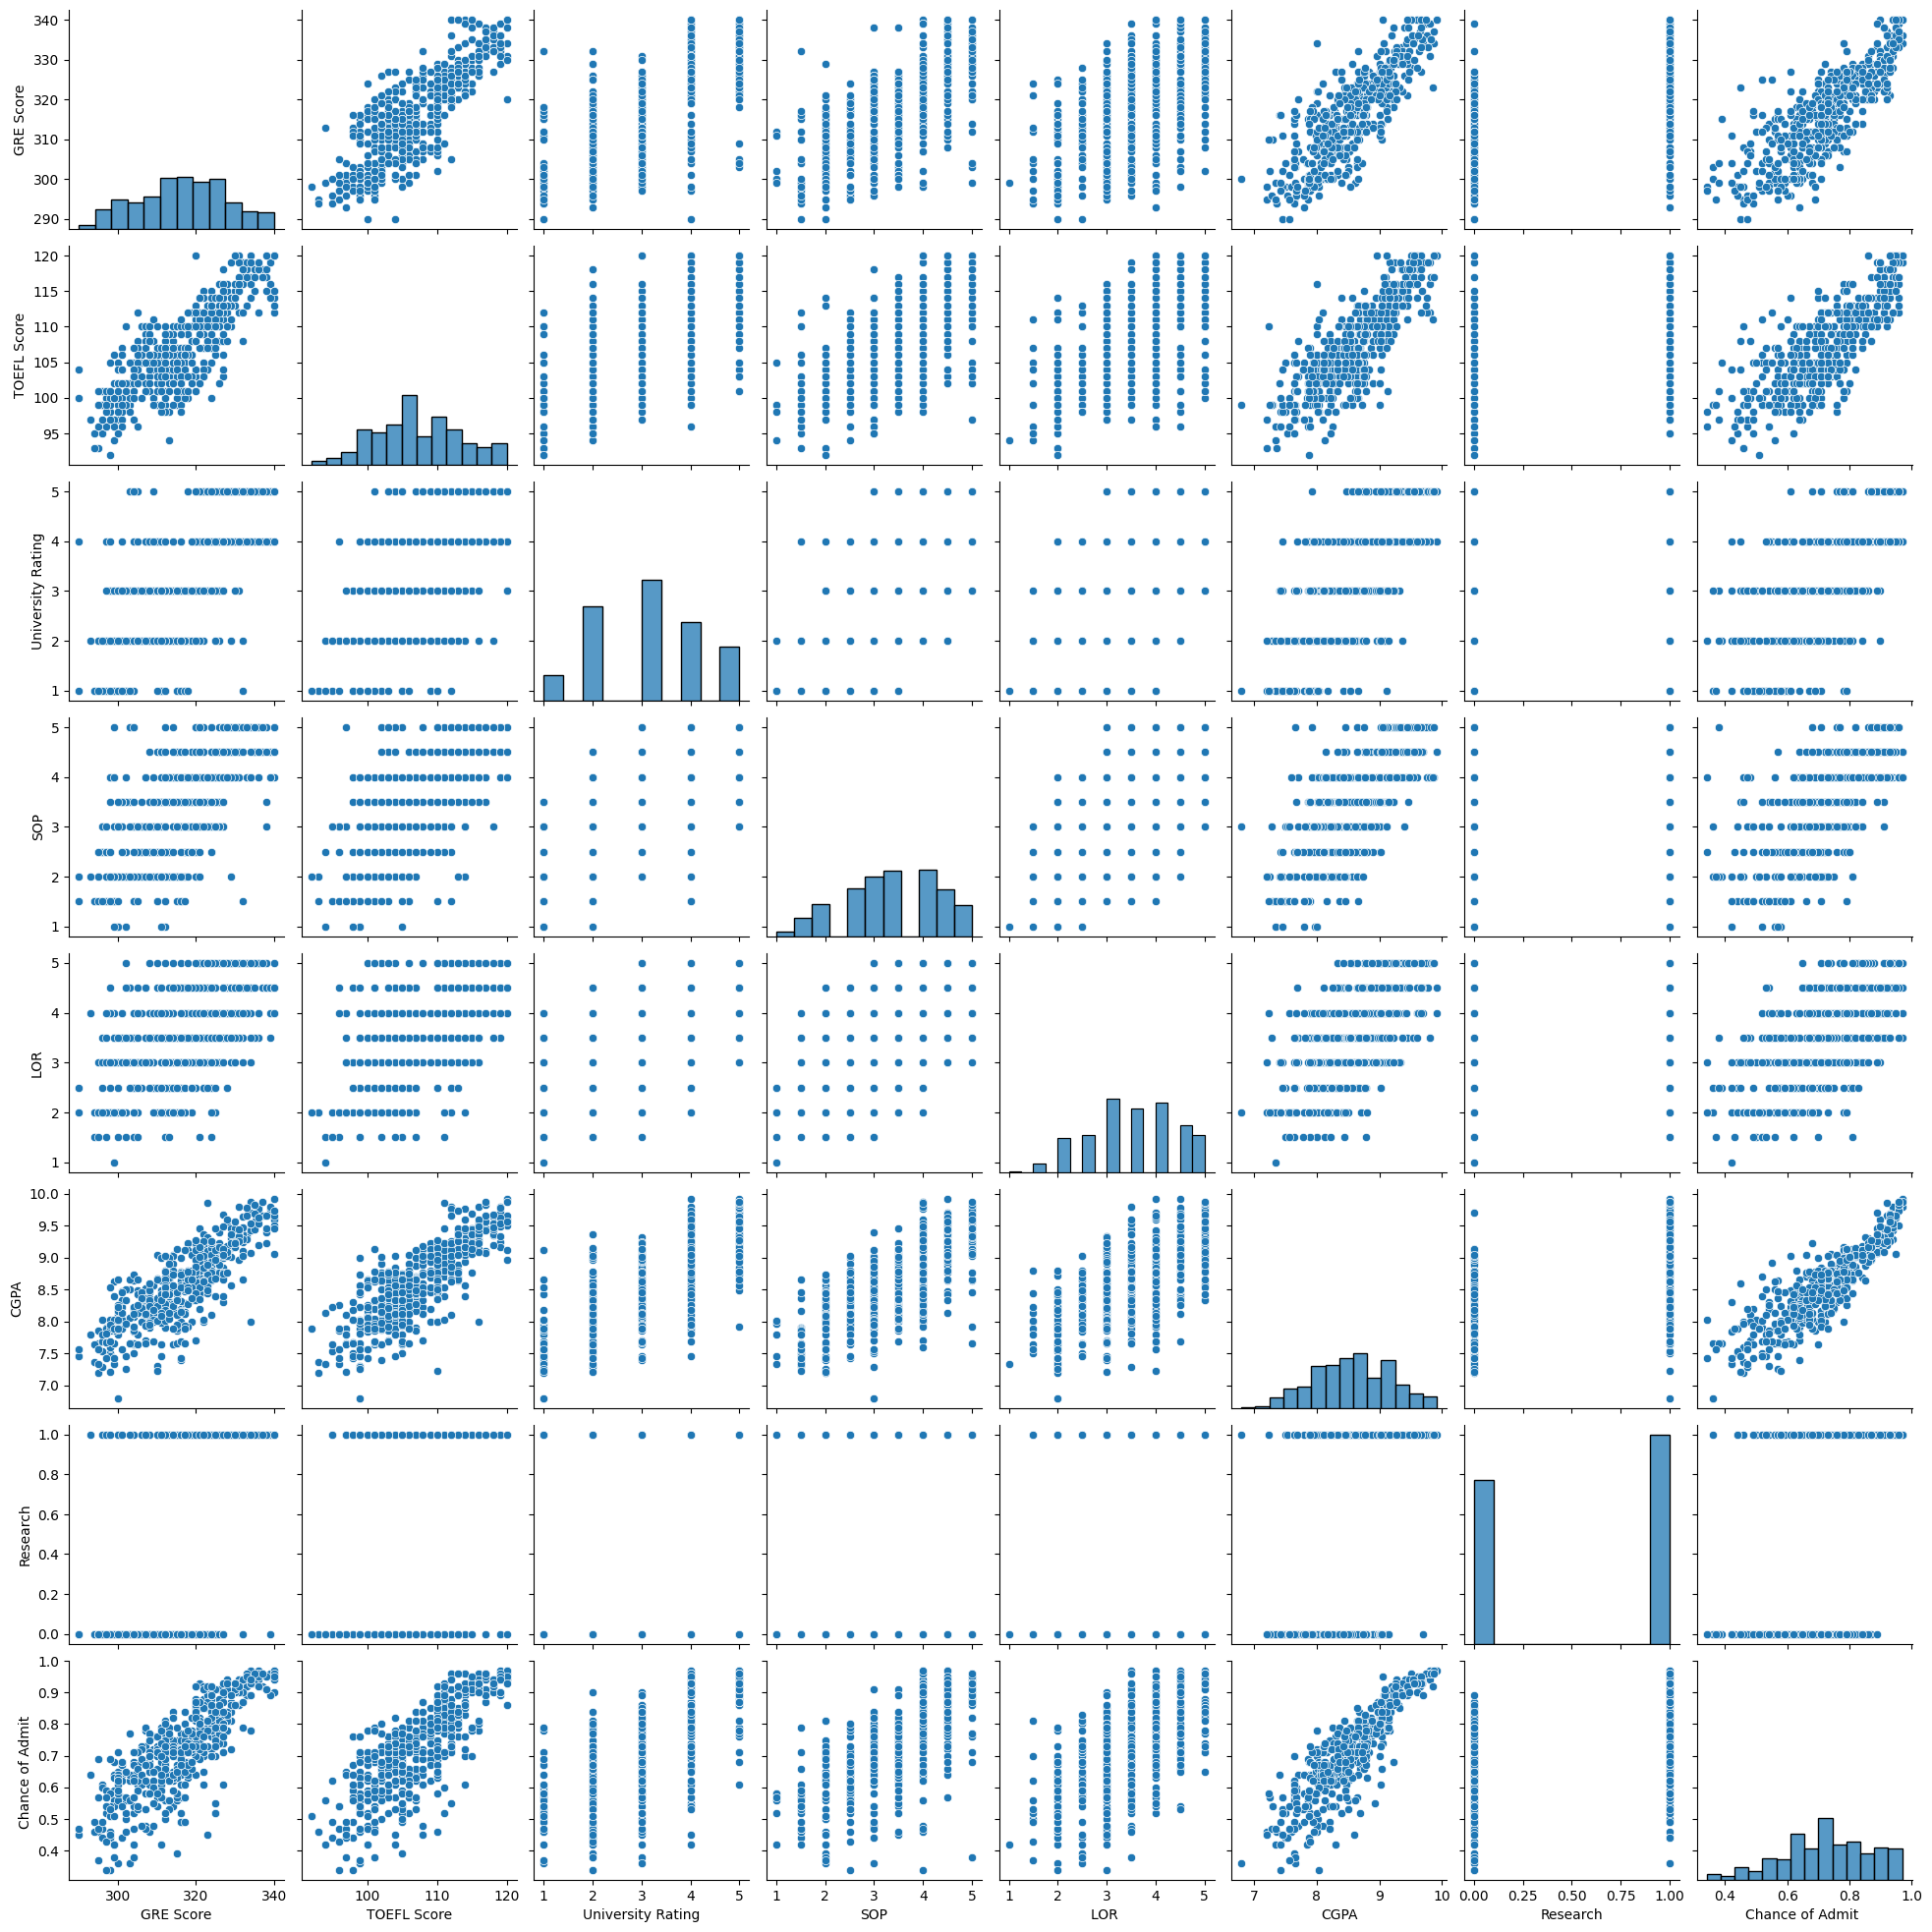

In [15]:
sns.pairplot(admission_df)

It seems that AS the GRE score increases, the chances of admission also increase. This means that there is a positive correlation between these two variables.
There is also a positive correlation between GRE Score and TOEFL score, GRE and CGPA and Chance of admission and CGPA

Text(0.5, 1.0, 'GRE Score vs TOEFL Score')

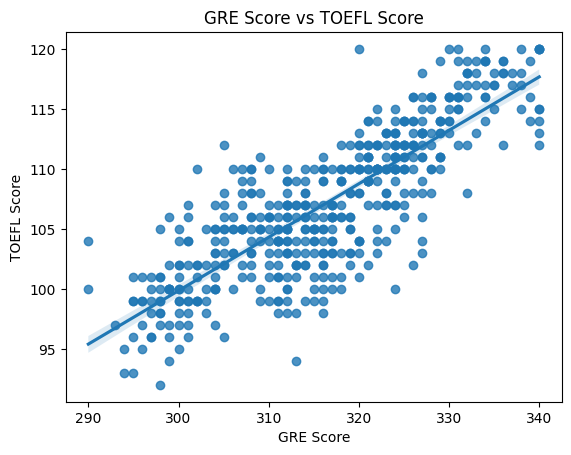

In [16]:
sns.regplot(x="GRE Score", y="TOEFL Score", data=admission_df)
plt.title("GRE Score vs TOEFL Score")

Text(0.5, 1.0, 'GRE Score vs CGPA')

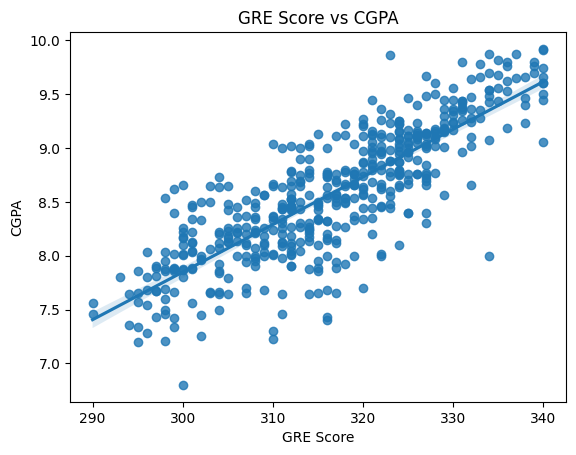

In [17]:
sns.regplot(x="GRE Score", y="CGPA", data=admission_df)
plt.title("GRE Score vs CGPA")

Text(0.5, 1.0, 'Chance of Admission vs CGPA')

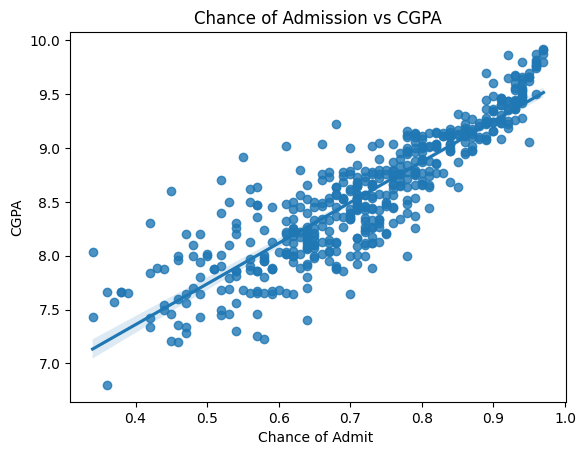

In [18]:
sns.regplot(x="Chance of Admit ", y="CGPA", data=admission_df)
plt.title("Chance of Admission vs CGPA")

Now, let's analyse the correlation, giving a hue to research. In the database, people who don't have research experience are marked as 0 and people with research experience are marked as 1. It seems to be that people with higher GRE Score and TOEFL Score have a research experience.

Text(0.5, 1.0, 'GRE Score vs TOEFL Score')

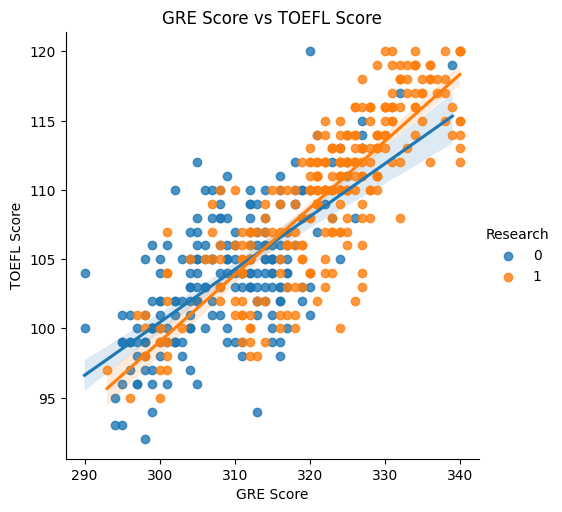

In [19]:
sns.lmplot(x="GRE Score", y="TOEFL Score", data=admission_df, hue="Research")
plt.title("GRE Score vs TOEFL Score")

Text(0.5, 1.0, 'GRE Score vs CGPA')

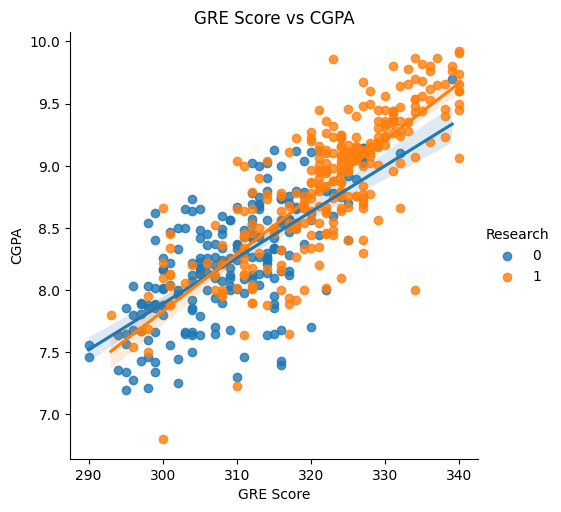

In [20]:
sns.lmplot(x="GRE Score", y="CGPA", data=admission_df, hue="Research")
plt.title("GRE Score vs CGPA")

Text(0.5, 1.0, 'Chance of Admit vs CGPA')

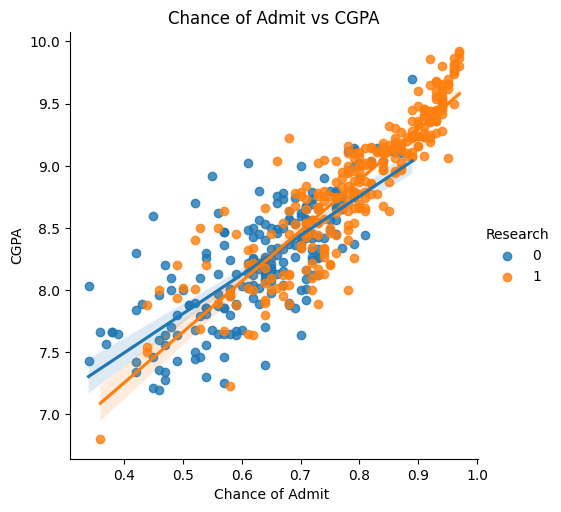

In [21]:
sns.lmplot(x="Chance of Admit ", y="CGPA", data=admission_df, hue="Research")
plt.title("Chance of Admit vs CGPA")

## TASK #5: CREATE TRAINING AND TESTING DATASET

We are going to create our training  and testing data set. Let's start by taking a look at the columns that we have in the data frame

In [22]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

We have to divide the data in inputs and outputs. Inputs will be called *x* and outputs will be called *y*.
Basically the scores, ratings are the input and the Chance of admission is the target variable that we are trying to predict.

In [23]:
x = admission_df.drop(columns = ['Chance of Admit '])

In [24]:
y = admission_df['Chance of Admit ']

In [25]:
x.shape

(500, 7)

In [26]:
y.shape

(500,)

In [27]:
x = np.array(x)
y = np.array(y)

In [28]:
y = y.reshape(-1,1)
y.shape

(500, 1)

Before we can work with the data, we need to scale, because the units on each feature are totally different and incomparable. To scale the data is that data means to all the features to be "equal".

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#instantiate an object out of my class
scaler_x = StandardScaler()
#applying the fit transform method passing along the x value, with a new output x
x = scaler_x.fit_transform(x)

In [30]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [31]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

## TASK #6: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [33]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(x_train, y_train)

LinearRegression()

In [34]:
accuracy_LinearRegression = LinearRegression_model.score(x_test, y_test)
accuracy_LinearRegression

0.7110526439347991

## TASK #7: TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [36]:
ANN_model = keras.Sequential()
#7 inputs, because I have 7 informations - GRE score, TOEFL, etc
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

#regresion test, so it should be linear
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

#mse = mean squared error
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                400       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0

In [37]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [38]:
epochs_hist = ANN_model.fit(x_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 1s 18ms/step - loss: 0.5999 - val_loss: 0.2103
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3519 - val_loss: 0.2454
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3233 - val_loss: 0.2090
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2421 - val_loss: 0.2316
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2549 - val_loss: 0.2219
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2496 - val_loss: 0.2073
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2397 - val_loss: 0.2773
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2587 - val_loss: 0.2170
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2325 - val_loss: 0.2239
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2205 - val_loss: 0.2190
Epoch 11

In [39]:
result = ANN_model.evaluate(x_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

3/3 [==============================] - 0s 3ms/step - loss: 0.3564
Accuracy : 0.6435976922512054


In [40]:
#progression of the network
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

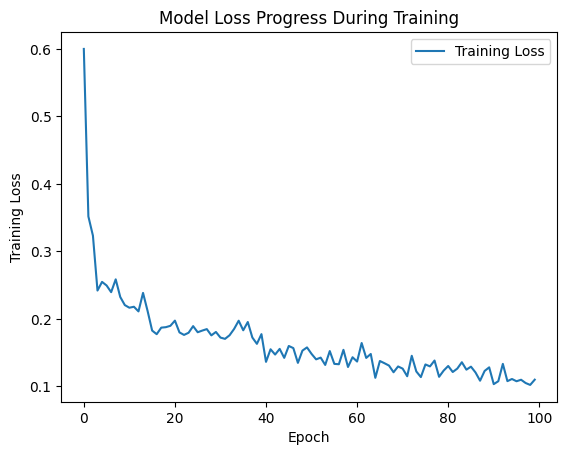

In [41]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

## TASK #8: TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [42]:
# Decision tree builds regression or classification models in the form of a tree structure.
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed.
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm

from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [43]:
accuracy_DecisionTree = DecisionTree_model.score(x_test, y_test)
accuracy_DecisionTree

0.4520826096728714

In [44]:
# Many decision Trees make up a random forest model which is an ensemble model.
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators=100, max_depth = 10)
RandomForest_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10)

In [45]:
accuracy_RandomForest = RandomForest_model.score(x_test, y_test)
accuracy_RandomForest

0.626759747178202

## TASK #9: CALCULATE REGRESSION MODEL KPIs

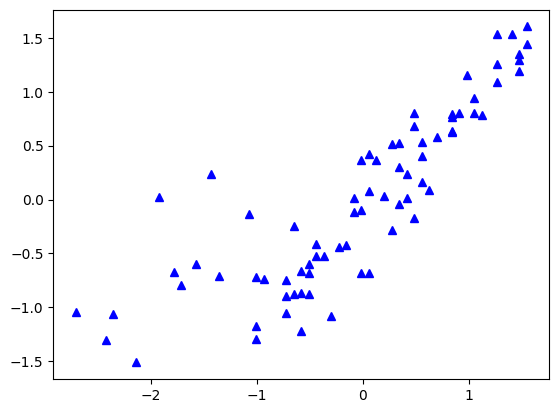

In [46]:
y_predict = LinearRegression_model.predict(x_test)
plt.plot(y_test, y_predict, '^', color = 'b')

In [47]:
#apply inverse transform to represent the data in its original units.
y_predict_original = scaler_y.inverse_transform(y_predict)
y_test_original = scaler_y.inverse_transform(y_test)

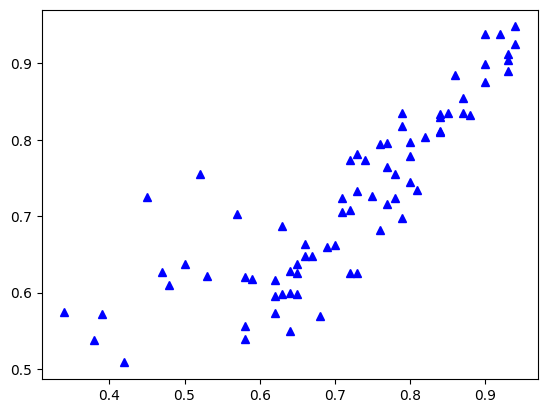

In [48]:
plt.plot(y_test_original, y_predict_original, '^', color='b')

In [49]:
k = x_test.shape[1]
n = len(x_test)
n

75

In [50]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_original, y_predict_original)),'.3f'))
MSE = mean_squared_error(y_test_original, y_predict_original)
MAE = mean_absolute_error(y_test_original, y_predict_original)
r2 = r2_score(y_test_original, y_predict_original)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.078 
MSE = 0.006033652289359787 
MAE = 0.0530272176495086 
R2 = 0.7110526439347991 
Adjusted R2 = 0.6808641141966437
